# Sanbercode Basic Python for Data Science
# Final Project Guide
---
---
---

## 1. Business/Project Understanding

- Explain project's background and requirement.
> HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Dana tersebut digunakan untuk menyalurkan bantuan kepada negara-negara yang sekiranya membutuhkan. Jadi CEO LSM memerlukan bantuan untuk menentukan negara mana yang memang pantas mendapatkan bantuan. Lalu juga dilihat dari beberapa faktor tambahan, seperti sosial, kesehatan dan ekonomi.

---
---

## 2. The Data



In [ ]:
# import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data_negara = pd.read_csv('Data_Negara_HELP.csv')
data_negara

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
      > Fitur pada dataset Data_Negara_HELP.csv ada 10, yaitu Negara, Kematian_anak, Ekspor,	Kesehatan,	Impor,	Pendapatan,	Inflasi,	Harapan_hidup,	Jumlah_fertiliti, dan	GDPperkapita
    -  How many rows it has?
     > Terdapat 167 baris



### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.




<Figure size 1200x1200 with 0 Axes>

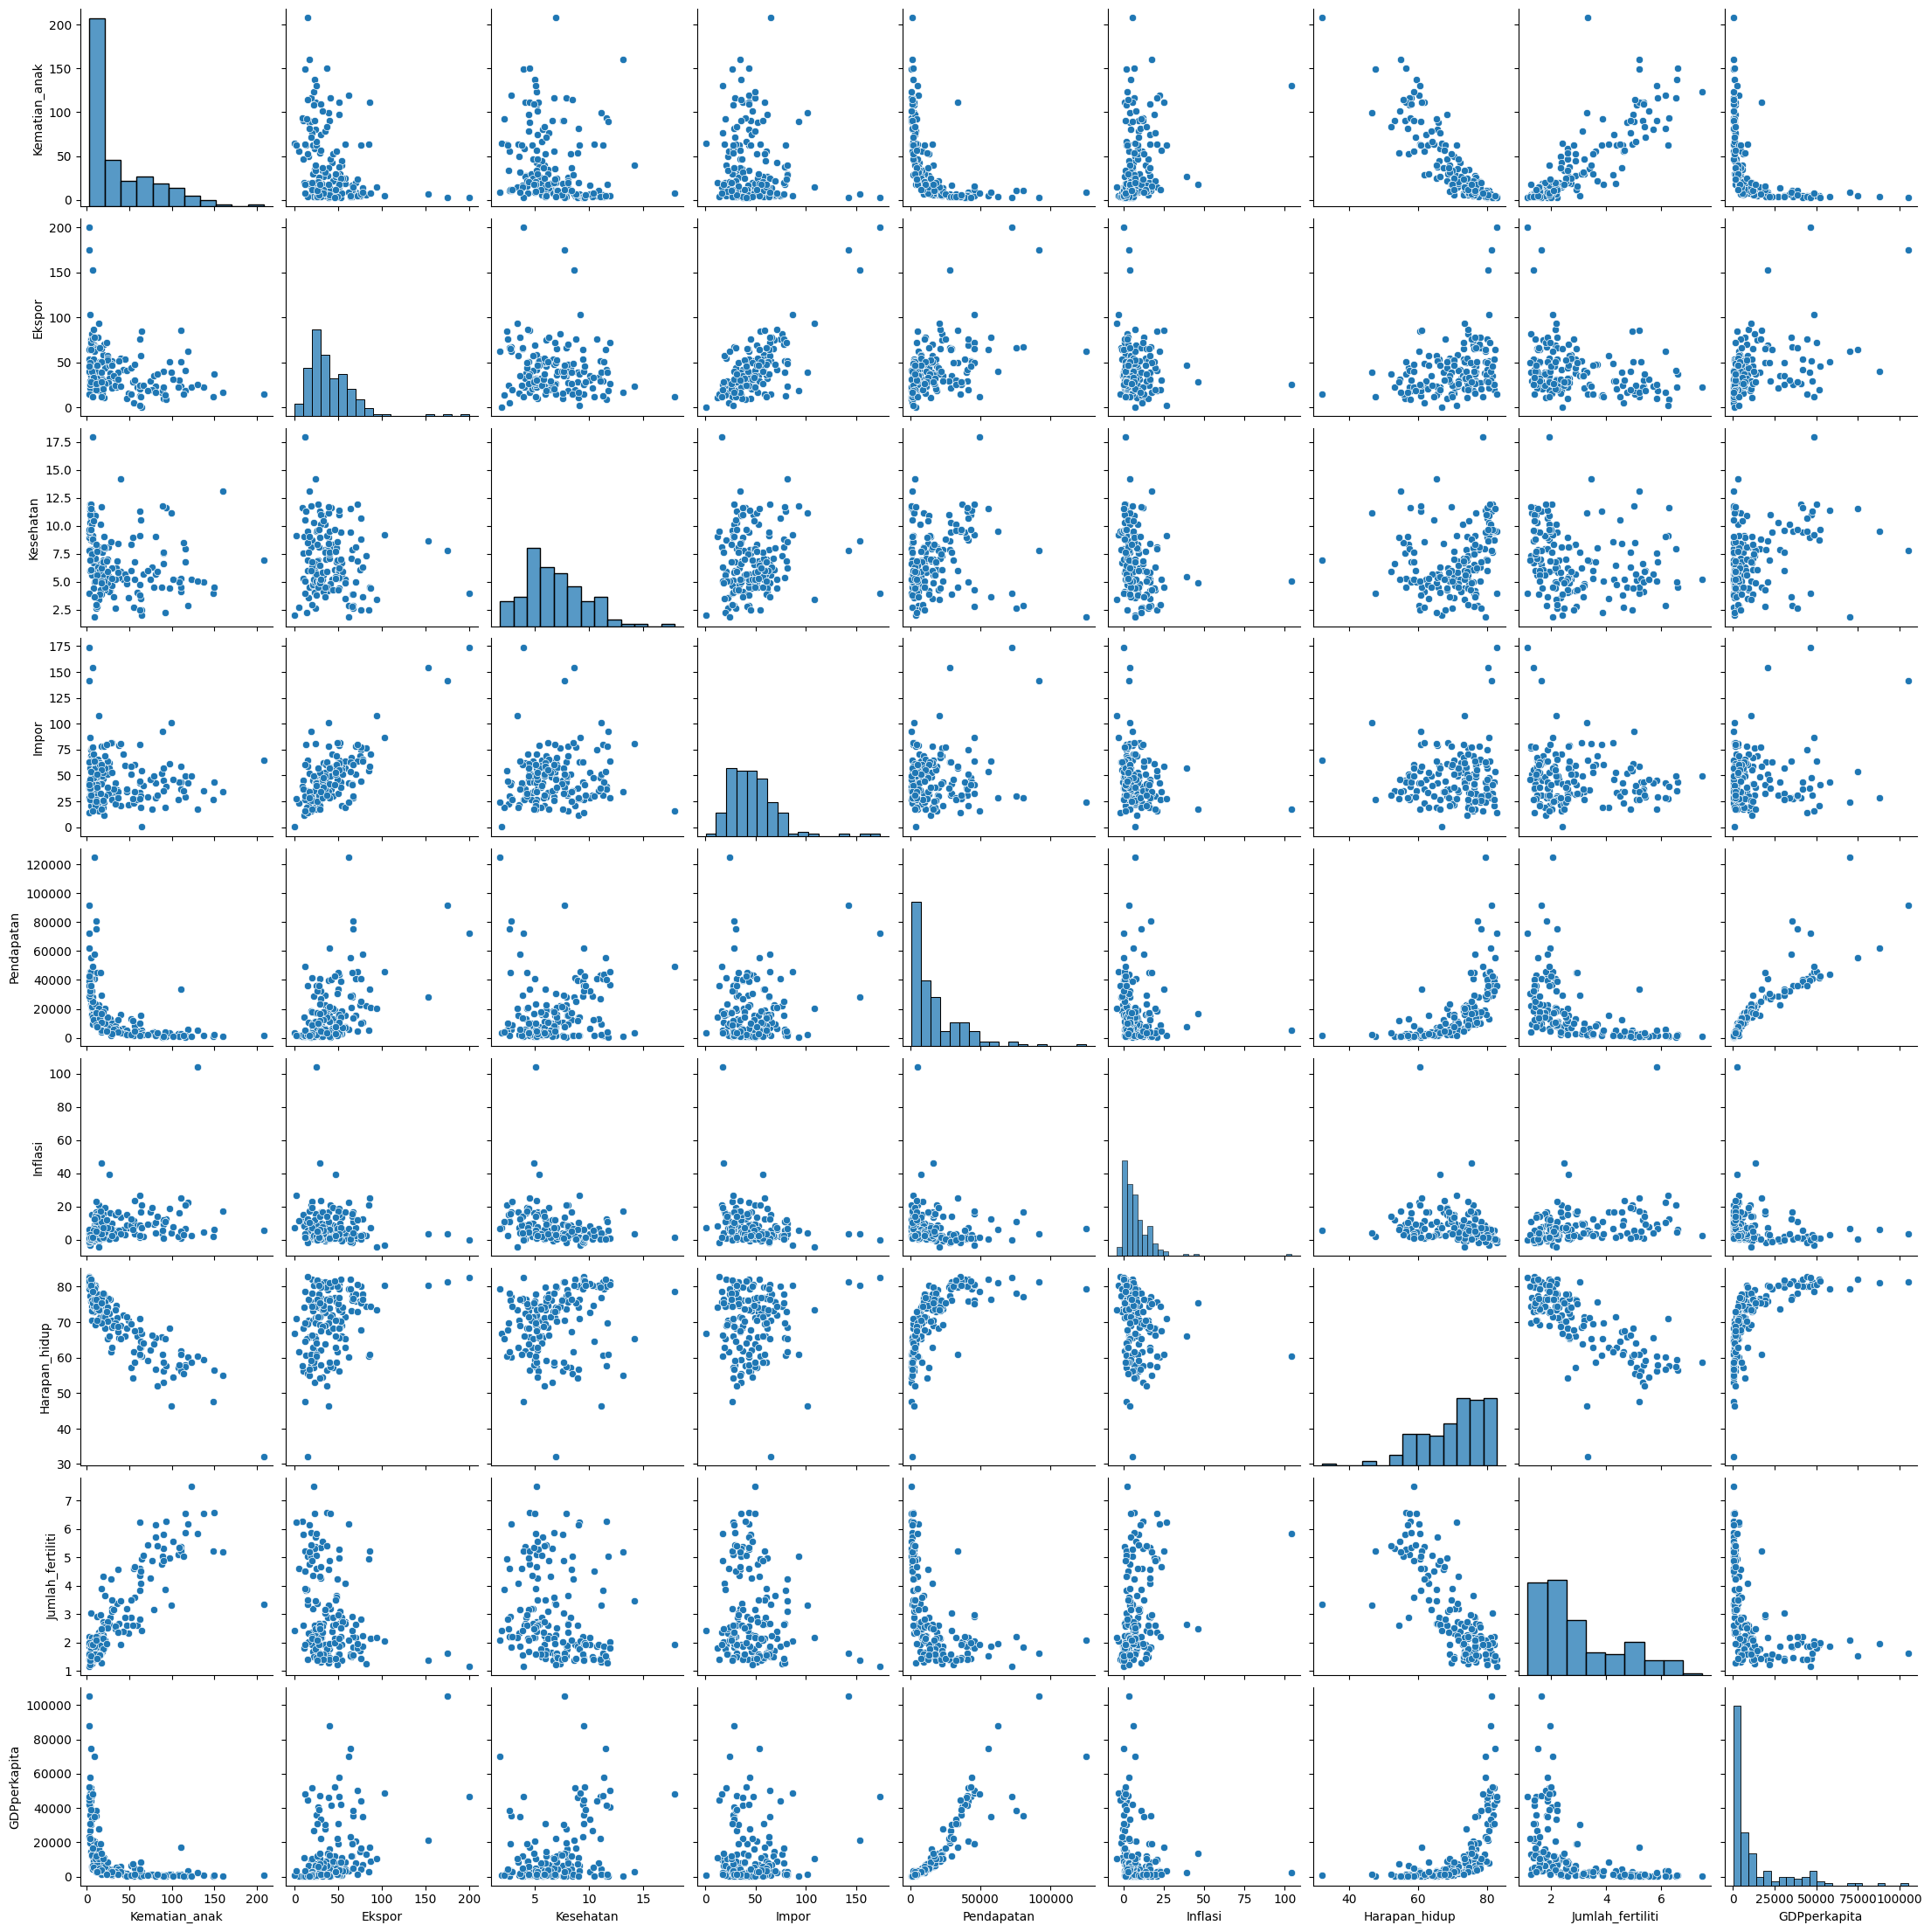

In [ ]:
# visualisasi data dengan pairplot
plt.figure(figsize=(12,12))
sns.pairplot(data=data_negara)
plt.show()

> Dari pairplot diatas, dapat disimpulkan bahwa pada GDPperkapita dan Pendapatan, menunjukkan hubungan positif, serta juga hubungan antara Jumlah_fertiliti dan Kematian_anak menunjukkan adanya hubungan positif.Hubungan positif lainnya ada tetapi tidak terlalu terlihat.

> Untuk Hubungan antara Harapan_Hidup dengan Kematian_anak terjadi hubungan negatif, selain itu juga hubungan Harapan_hidup dengan Jumlah_fertiliti


<ipython-input-13-a7843a8473a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_negara.corr())


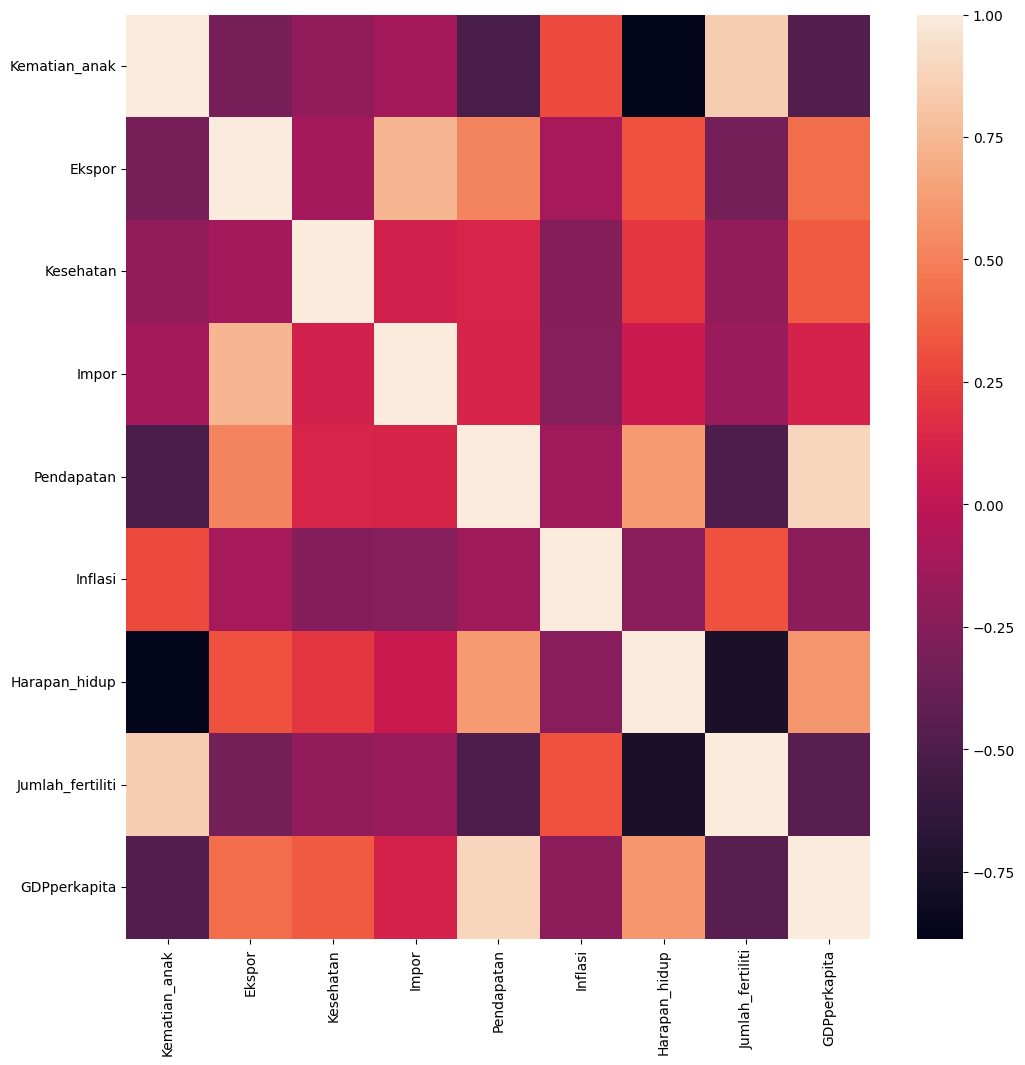

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_negara.corr())
plt.show()

Dari heatmap diatas, dapat disimpulkan bahwa ada 5 korelasi positif, yaitu :
> Kematian anak & Jumlah fertility;
> Harapan hidup & Pendapatan;
> Harapan hidup & GDP perkapita;
> Ekspor & Impor;
> Pendapatan & GDP perkapita




Selain itu juga ada yang berkorelasi lemah, yaitu:
> Kesehatan & GDP perkapita

### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
> Dari Heatmap tersebut, yang berkorelasi positif dan fitur yang akan digunakan untuk proses analisis dan clustering adalah Jumlah_Fertiliti dan Kematian_anak
2. Elaborate the reason you chose them. <b>*</b>
> Karena fitur Jumlah_Fertiliti dan Kematian_anak memiliki korelasi yang positif yang menandakan adanya keterkaitan, selain itu juga dapat menunjukan situasi dari suatu Negara.
    


### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
<br><br>
2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
    


In [ ]:
data_negara.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Dari hasil tersebut menunjukkan bahwa data ini tidak ada missing value

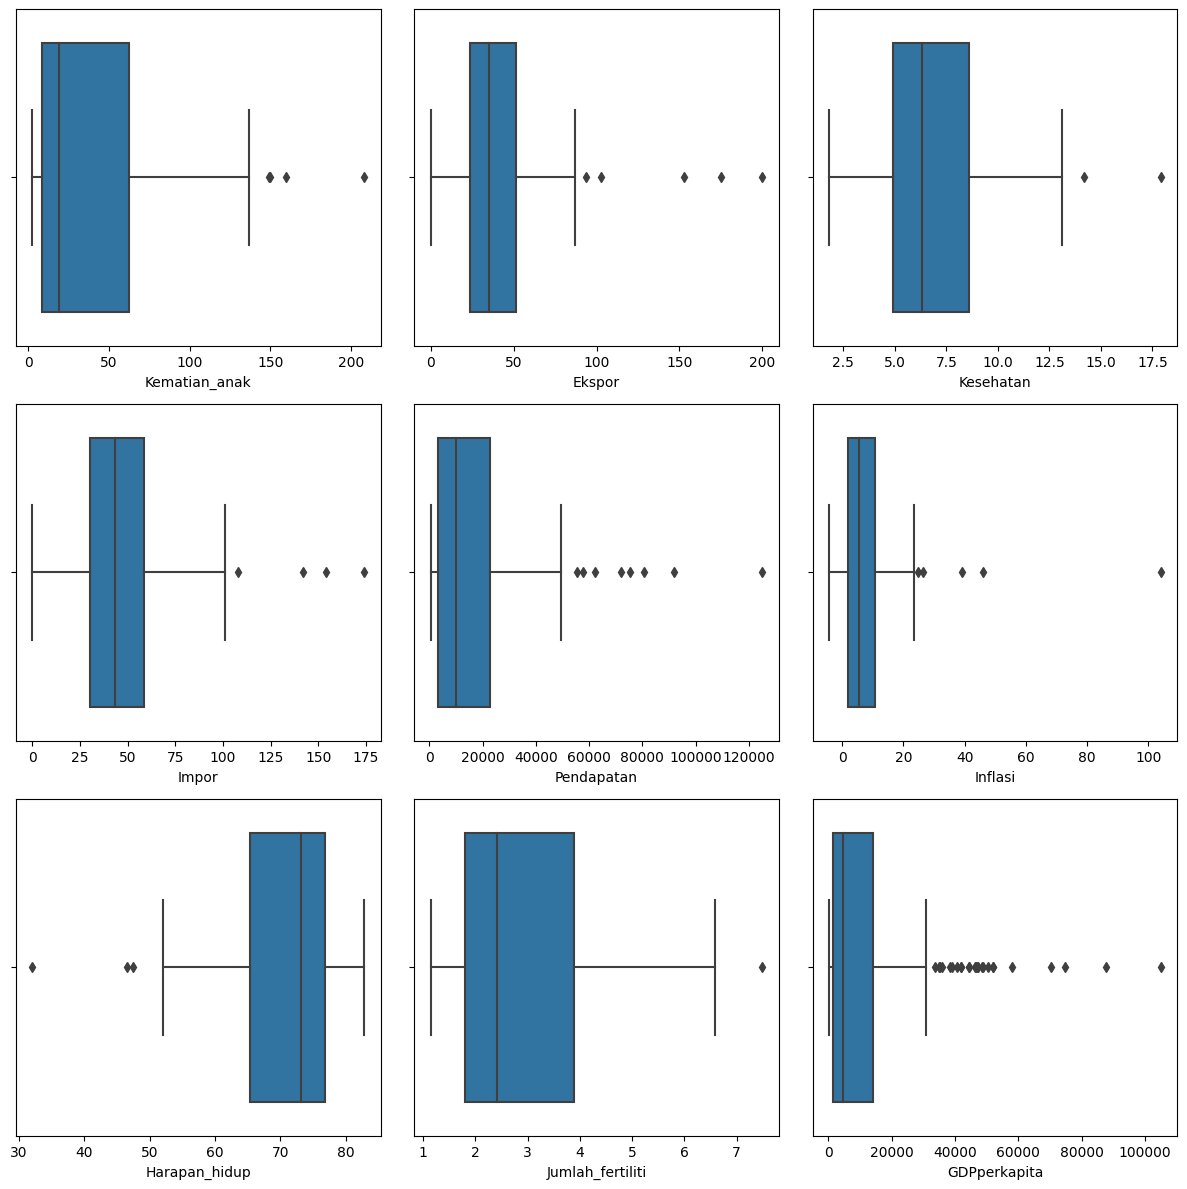

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(3, 3, 1)
sns.boxplot(x='Kematian_anak', data=data_negara)

plt.subplot(3, 3, 2)
sns.boxplot(x='Ekspor', data=data_negara)

plt.subplot(3, 3, 3)
sns.boxplot(x='Kesehatan', data=data_negara)

plt.subplot(3, 3, 4)
sns.boxplot(x='Impor', data=data_negara)

plt.subplot(3, 3, 5)
sns.boxplot(x='Pendapatan', data=data_negara)

plt.subplot(3, 3, 6)
sns.boxplot(x='Inflasi', data=data_negara)

plt.subplot(3, 3, 7)
sns.boxplot(x='Harapan_hidup', data=data_negara)

plt.subplot(3, 3, 8)
sns.boxplot(x='Jumlah_fertiliti', data=data_negara)

plt.subplot(3, 3, 9)
sns.boxplot(x='GDPperkapita', data=data_negara)
plt.tight_layout()
plt.show()

Outliers tidak hilangkan karena ada kemungkinan bahwa outliers tersebut merupakan representasi dari kondisi negara yang pada list dan dengan jika menghilangkannya bisa saja mengubah data, dan terjadi kesalahan saat memutuskan negara yang benar-benar membutuhkan bantuan

### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

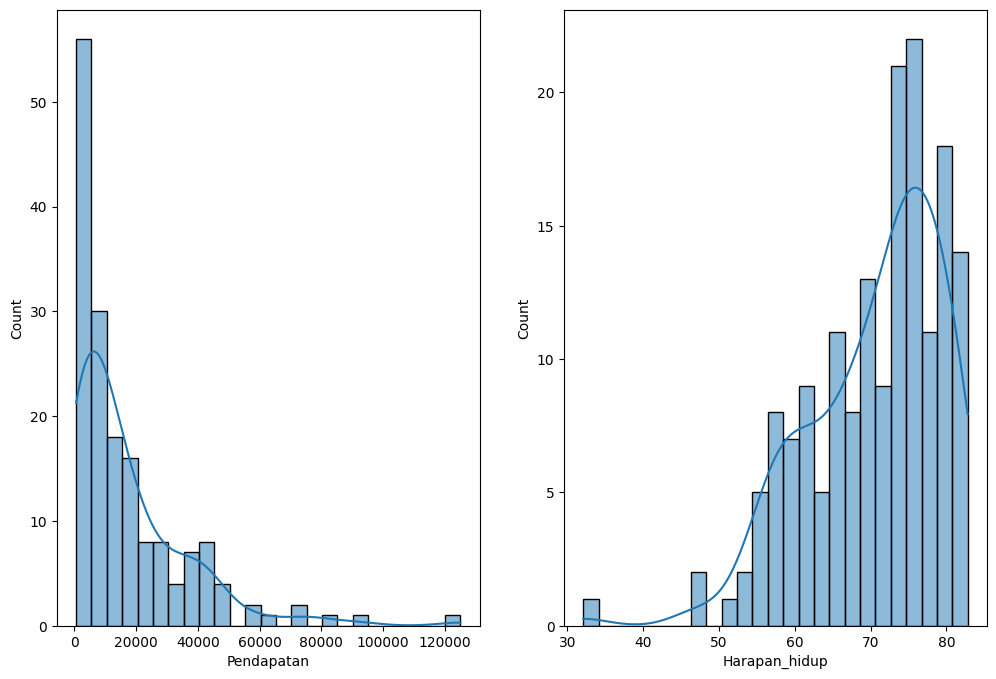

In [ ]:
# Univariate analysis
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.histplot(data_negara['Pendapatan'], bins = 25, kde = True)

plt.subplot(1, 2, 2)
sns.histplot(data_negara['Harapan_hidup'], bins = 25, kde = True)
plt.show()

Histogram dari data Pendapatan berada pada range nilai 609-125.000, dengan rata-rata pendapatan sebesar 17.144. Frekuensi tersebesar terdapat pada pendapatan negara terendah sebanyak ±55 negara.

Histogram dari data harapan hidup berada pada range nilai 32-82 tahun. Angka harapan hidup pada range 70-80 merupakan range frekuensi tertinggi.

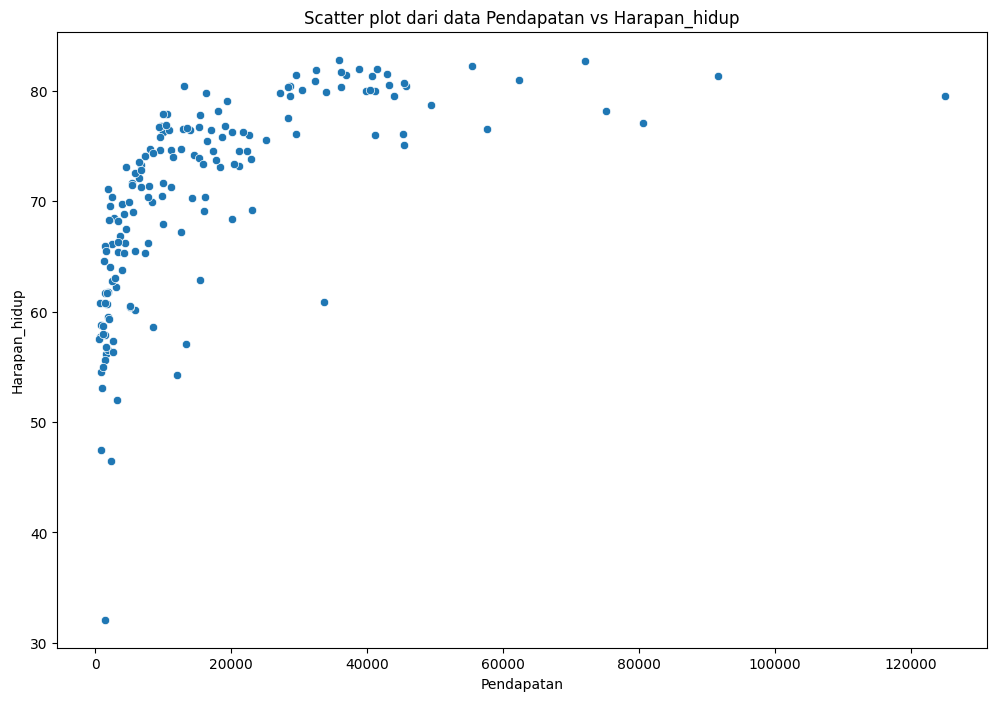

In [ ]:
# Bivariate analysis
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(data = data_negara, x = 'Pendapatan', y ='Harapan_hidup' )
plt.title('Scatter plot dari data Pendapatan vs Harapan_hidup')
plt.show()

Dari scatterplot diatas dapat disimpulkan bahwa pendapatan dan harapan hidup memiliki keterkaitan.

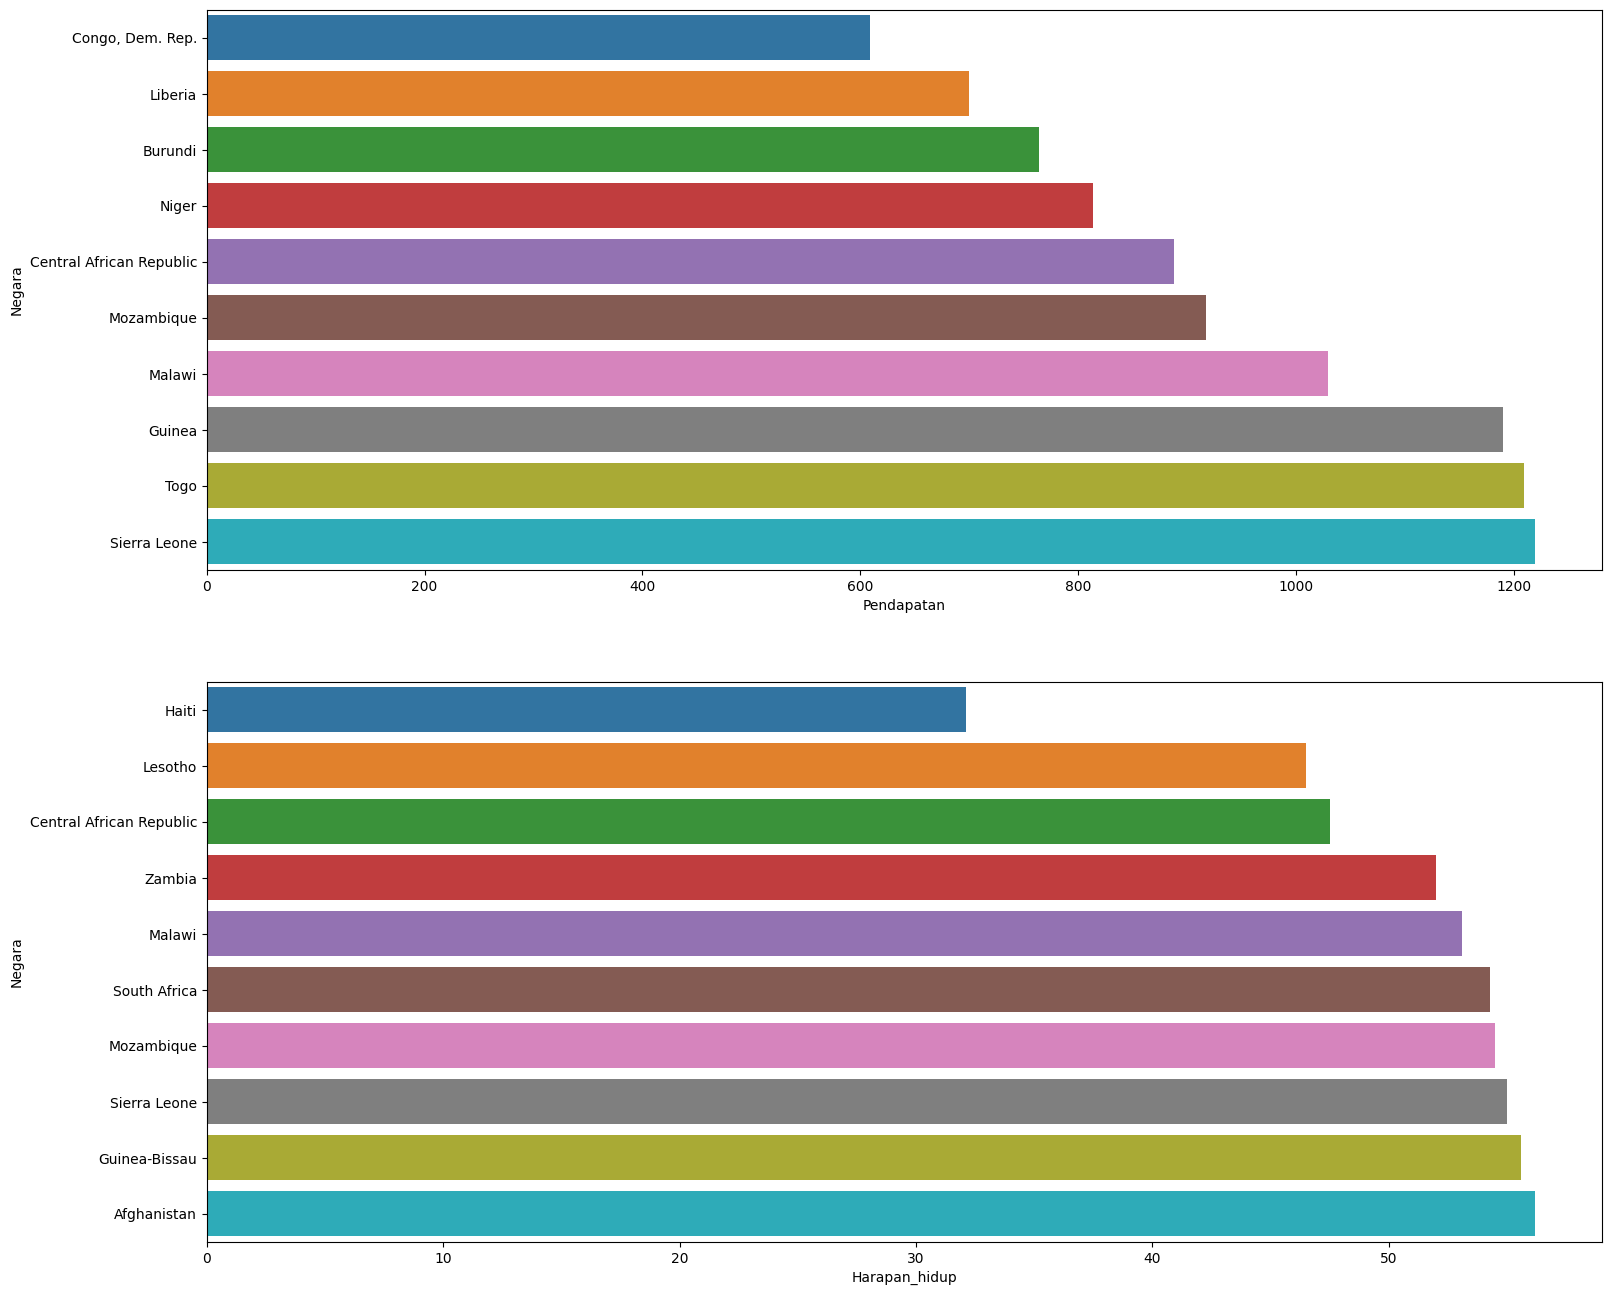

In [ ]:
# Visualiasi data dari 10 negara dengan Pendapatan dan Harapan hidup terendah.

plt.figure(figsize=(18, 16))

plt.subplot(2, 1, 1)
pendapatan_data_negara = data_negara.nsmallest(10, columns=['Pendapatan'])
sns.barplot(data=pendapatan_data_negara, x="Pendapatan", y="Negara")

plt.subplot(2, 1, 2)
harapan_hidup_data_negara = data_negara.nsmallest(10, columns=['Harapan_hidup'])
sns.barplot(data=harapan_hidup_data_negara, x="Harapan_hidup", y="Negara")
plt.show()

Dari total 167 negara, Pendapatan terendah diraih oleh negara Congo Dem. Rep. dan Harapan hidup terendah ditempati oleh Haiti.

---
---

## 3. Clustering
1. Scale the Data
<br><br>
2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
<br><br>
3. Do clustering with the decided amount of cluster.
<br><br>
4. Create the clustering result graph.

In [ ]:
non_numerik_data_negara = data_negara.drop(columns='Negara')
display(non_numerik_data_negara)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# rescale data dengan menggunakan Standard Scaler
sc = StandardScaler()
data_negara_scaled = sc.fit_transform(non_numerik_data_negara)
data_negara_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
data_negara_scaled = pd.DataFrame(data_negara_scaled, columns = non_numerik_data_negara.columns)
display(data_negara_scaled)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

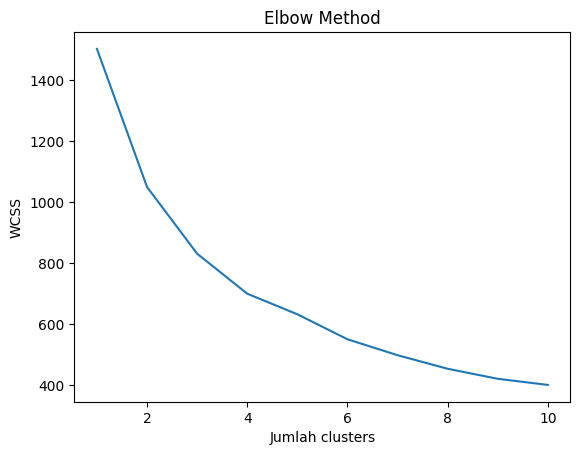

In [ ]:
#Elbow Method
WCSS = []

for i in range (1,11):
  kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 40)
  kmeans.fit(data_negara_scaled)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS)

plt.title('Elbow Method')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

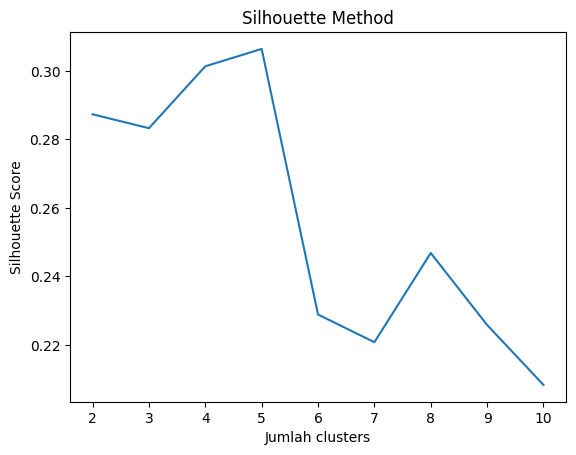

In [ ]:
# Silhouette score method
from sklearn.metrics import silhouette_score

data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(data_negara_scaled)
    labels = kmeans.labels_
    data.append(silhouette_score(data_negara_scaled, labels, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list, data)

plt.title('Silhouette Method')
plt.xlabel('Jumlah clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [ ]:
# clustering menggunakan k-means dengan k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_negara_scaled)
data_negara['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


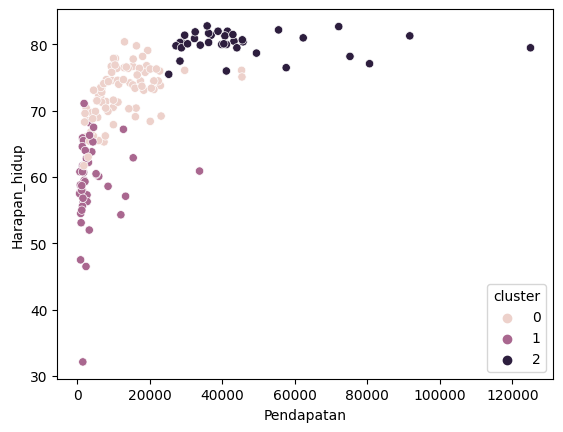

In [ ]:
sns.scatterplot(x=data_negara['Pendapatan'], y=data_negara['Harapan_hidup'], hue=data_negara['cluster'])
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

In [ ]:
help_dn = data_negara[data_negara['cluster']==1]
help_dn.sort_values(['Pendapatan','Harapan_hidup'], ascending=[True, True]).head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1


---
---

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
> Cluster yang akan difokuskan merupakan cluster 1
2. Show which countries included in that cluster.
<br><br>
> 5 Negara yang akan diutamakan untuk mendapatkan bantuan adalah Congo, Dem. Rep., Liberia, Burundi, Niger, dan Central African Republic.
3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.
> Negara yang sudah dipastikan mendapatkan bantuan tentu saja negara Congo, karena negara tersebut merupakan negara dengan penghasilan terendah.

---
---